In [81]:
import pandas as pd

from sklearn import model_selection

import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

In [12]:
pd.get_dummies(X, drop_first=True)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


In [65]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


In [15]:
import numpy as np

In [72]:
np.random.seed(1234)
np.random.randn(5)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [75]:
np.random.randn(5)

array([ 0.00211836,  0.40545341,  0.28909194,  1.32115819, -1.54690555])

In [67]:
from sklearn import linear_model

In [76]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


est = linear_model.LinearRegression()
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

Text(0.5, 1.0, 'Residual plot')

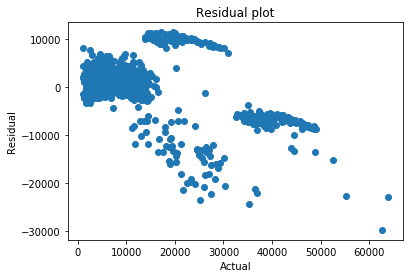

In [85]:
residual = y_train_pred - y_train
plt.scatter(y_train, residual)
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

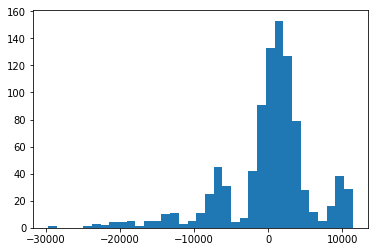

In [84]:
plt.hist(residual, bins = 35);

In [80]:
SSE_train = ((y_train_pred - y_train) ** 2).sum()
SSE_test = ((y_test_pred - y_test) ** 2).sum()

In [86]:
MSE_train = ((y_train_pred - y_train) ** 2).mean()
MSE_test = ((y_test_pred - y_test) ** 2).mean()

In [87]:
MSE_train/MSE_test

0.9922564115746513

In [88]:
SST = ((y_train.mean() - y_train) ** 2).sum()

In [89]:
SSE_train/SST

0.24544425073668388

In [91]:
r2 = 1 - SSE_train/SST
r2

0.7545557492633161

In [92]:
from sklearn import metrics

In [93]:
metrics.r2_score(y_train, y_train_pred)

0.7545557492633161

In [94]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [109]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("r2 train", metrics.r2_score(y_train, y_train_pred))
print("r2 test", metrics.r2_score(y_test, y_test_pred))

print("rmse train", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("rmse test", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train 0.7545557492633161
r2 test 0.7405989316927212
rmse train 6039.6018713245385
rmse test 6063.12265685045


In [110]:
6063 / np.std(y_train)

0.4973426328027082

In [111]:
est.coef_

array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
       24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866])

In [112]:
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,age,251.681865
1,bmi,322.389107
2,children,344.964255
3,gender_male,-282.796347
4,smoker_yes,24059.390477
5,region_northwest,-304.090098
6,region_southeast,-939.342097
7,region_southwest,-868.188559


In [113]:
est.intercept_

-11039.23841856155